In [48]:
from mtcnn import MTCNN
import numpy as np
import os
from PIL import Image
import cv2

import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

%matplotlib inline

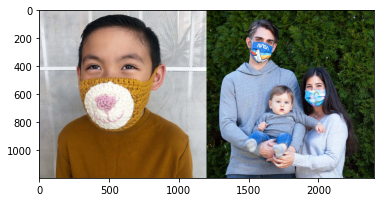

In [71]:
img = cv2.imread('test/mask/Mask66.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [130]:
mtcnn = MTCNN()
detection = mtcnn.detect_faces(img)
detection

[{'box': [257, 135, 588, 741],
  'confidence': 0.9999923706054688,
  'keypoints': {'left_eye': (385, 419),
   'right_eye': (667, 417),
   'nose': (488, 528),
   'mouth_left': (383, 683),
   'mouth_right': (616, 678)}},
 {'box': [1515, 138, 172, 208],
  'confidence': 0.9999910593032837,
  'keypoints': {'left_eye': (1574, 217),
   'right_eye': (1656, 232),
   'nose': (1616, 262),
   'mouth_left': (1570, 293),
   'mouth_right': (1639, 304)}},
 {'box': [1676, 603, 122, 142],
  'confidence': 0.9999504089355469,
  'keypoints': {'left_eye': (1715, 658),
   'right_eye': (1772, 662),
   'nose': (1742, 680),
   'mouth_left': (1718, 714),
   'mouth_right': (1757, 716)}},
 {'box': [1907, 475, 144, 174],
  'confidence': 0.9996805191040039,
  'keypoints': {'left_eye': (1943, 550),
   'right_eye': (2009, 541),
   'nose': (1975, 583),
   'mouth_left': (1960, 616),
   'mouth_right': (2012, 608)}}]

In [73]:
def trace(image, detection):
    plt.imshow(image)
    axes = plt.gca()
    for result in detection:
        x, y, width, height = result['box']
        traced_rectangle = Rectangle((x, y), width, height,
        fill=False, color='red')
        axes.add_patch(traced_rectangle)
    
#         for key, value in result['keypoints'].items():
#             key_points = Circle(value, radius=2, color='red')
#             axes.add_patch(key_points)
    
    plt.show()

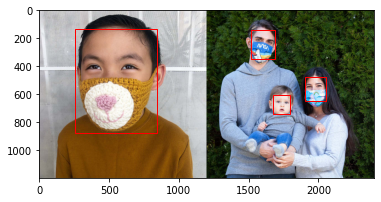

In [74]:
trace(img, detection)

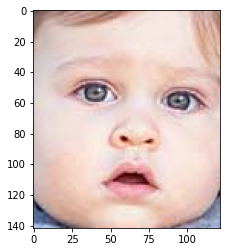

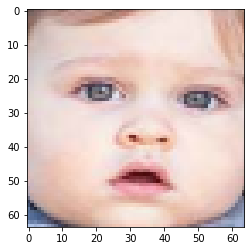

In [106]:
x, y, w, h = detection[2]['box']
crop = img[y:y+h, x:x+w]
plt.imshow(crop)
plt.show()
resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)
plt.imshow(resized)

In [107]:
from tensorflow.keras.models import load_model

In [108]:
model = load_model('./models/vgg_mask.h5')

In [143]:
for i in range(len(detection)):
    x, y, w, h = detection[i]['box']
    crop = img[y:y+h, x:x+w]
    resized = cv2.resize(crop, (64, 64), interpolation=cv2.INTER_AREA)

    pred = np.argmax(model.predict(resized[np.newaxis, ...]))
    detection[i]['pred'] = 'mask' if not pred else 'no_mask'

In [145]:
def trace(image, detection):
    plt.imshow(image)
    axes = plt.gca()
    for result in detection:
        x, y, width, height = result['box']
        traced_rectangle = Rectangle((x, y), width, height,
        fill=False, color='green' if result['pred']=='mask' else 'red')
        axes.add_patch(traced_rectangle)
    
#         for key, value in result['keypoints'].items():
#             key_points = Circle(value, radius=2, color='red')
#             axes.add_patch(key_points)
    
    plt.show()

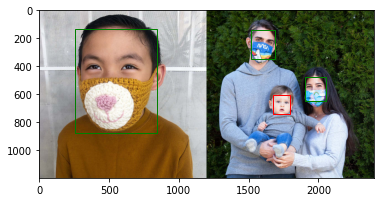

In [146]:
trace(img, detection)

In [ ]:
imgs